In [1]:
import os; os.chdir('../')
import sys; sys.path.append('.')

# Look at RI
## Current status
- sell 
    - 5cedb5e7d71f1089a8568141:67<--(5) 
    - 5cedb5e7d71f1089a8568141:133
- buy 
    - 5cdc8f34d71f102dbd7b03c7: 345

In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [3]:
import json
from datetime import datetime, timezone

In [4]:
from mongoengine.connection import disconnect
from importlib import reload
import py.classes as classes;reload(classes)
import py.mongo as mongo;reload(mongo)
import experiment_analysis.mongo_utils as mu;reload(mu)
disconnect()
db = mongo.connect_to_mongo(db_name='evo_v2')

import logging
l = logging.getLogger("my_logger")
logging.basicConfig(level=logging.DEBUG)

<module 'py.classes' from '/Users/userid/git/evotrade/py/classes.py'>

<module 'py.mongo' from '/Users/userid/git/evotrade/py/mongo.py'>

<module 'experiment_analysis.mongo_utils' from '/Users/userid/git/evotrade/experiment_analysis/mongo_utils.py'>

In [5]:
df = {}
points = {}

---

# V2

In [6]:
#RI sell 5M
exp_id = '5d0e9a1bd71f100b8a48f459'
df[exp_id], points[exp_id] = mu.get_experiment_info(exp_id)

In [7]:
dft = df[exp_id]

In [8]:
df_tuned = dft[dft.fine_tuned == True]
df_not_tuned = dft[dft.fine_tuned == False]

In [9]:
mu.add_colors_and_move(dft.reset_index().sort_values(by='vprofit', ascending=False))

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Step 21, sum 145480, mean=195.53763440860214, std=282.8245939395323 deals=744
Step 50, sum 191815, mean=118.91816491010539, std=257.129647901367 deals=1613
Final: sum 117260, mean=212.42753623188406, std=297.06778483480724 deals=552


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


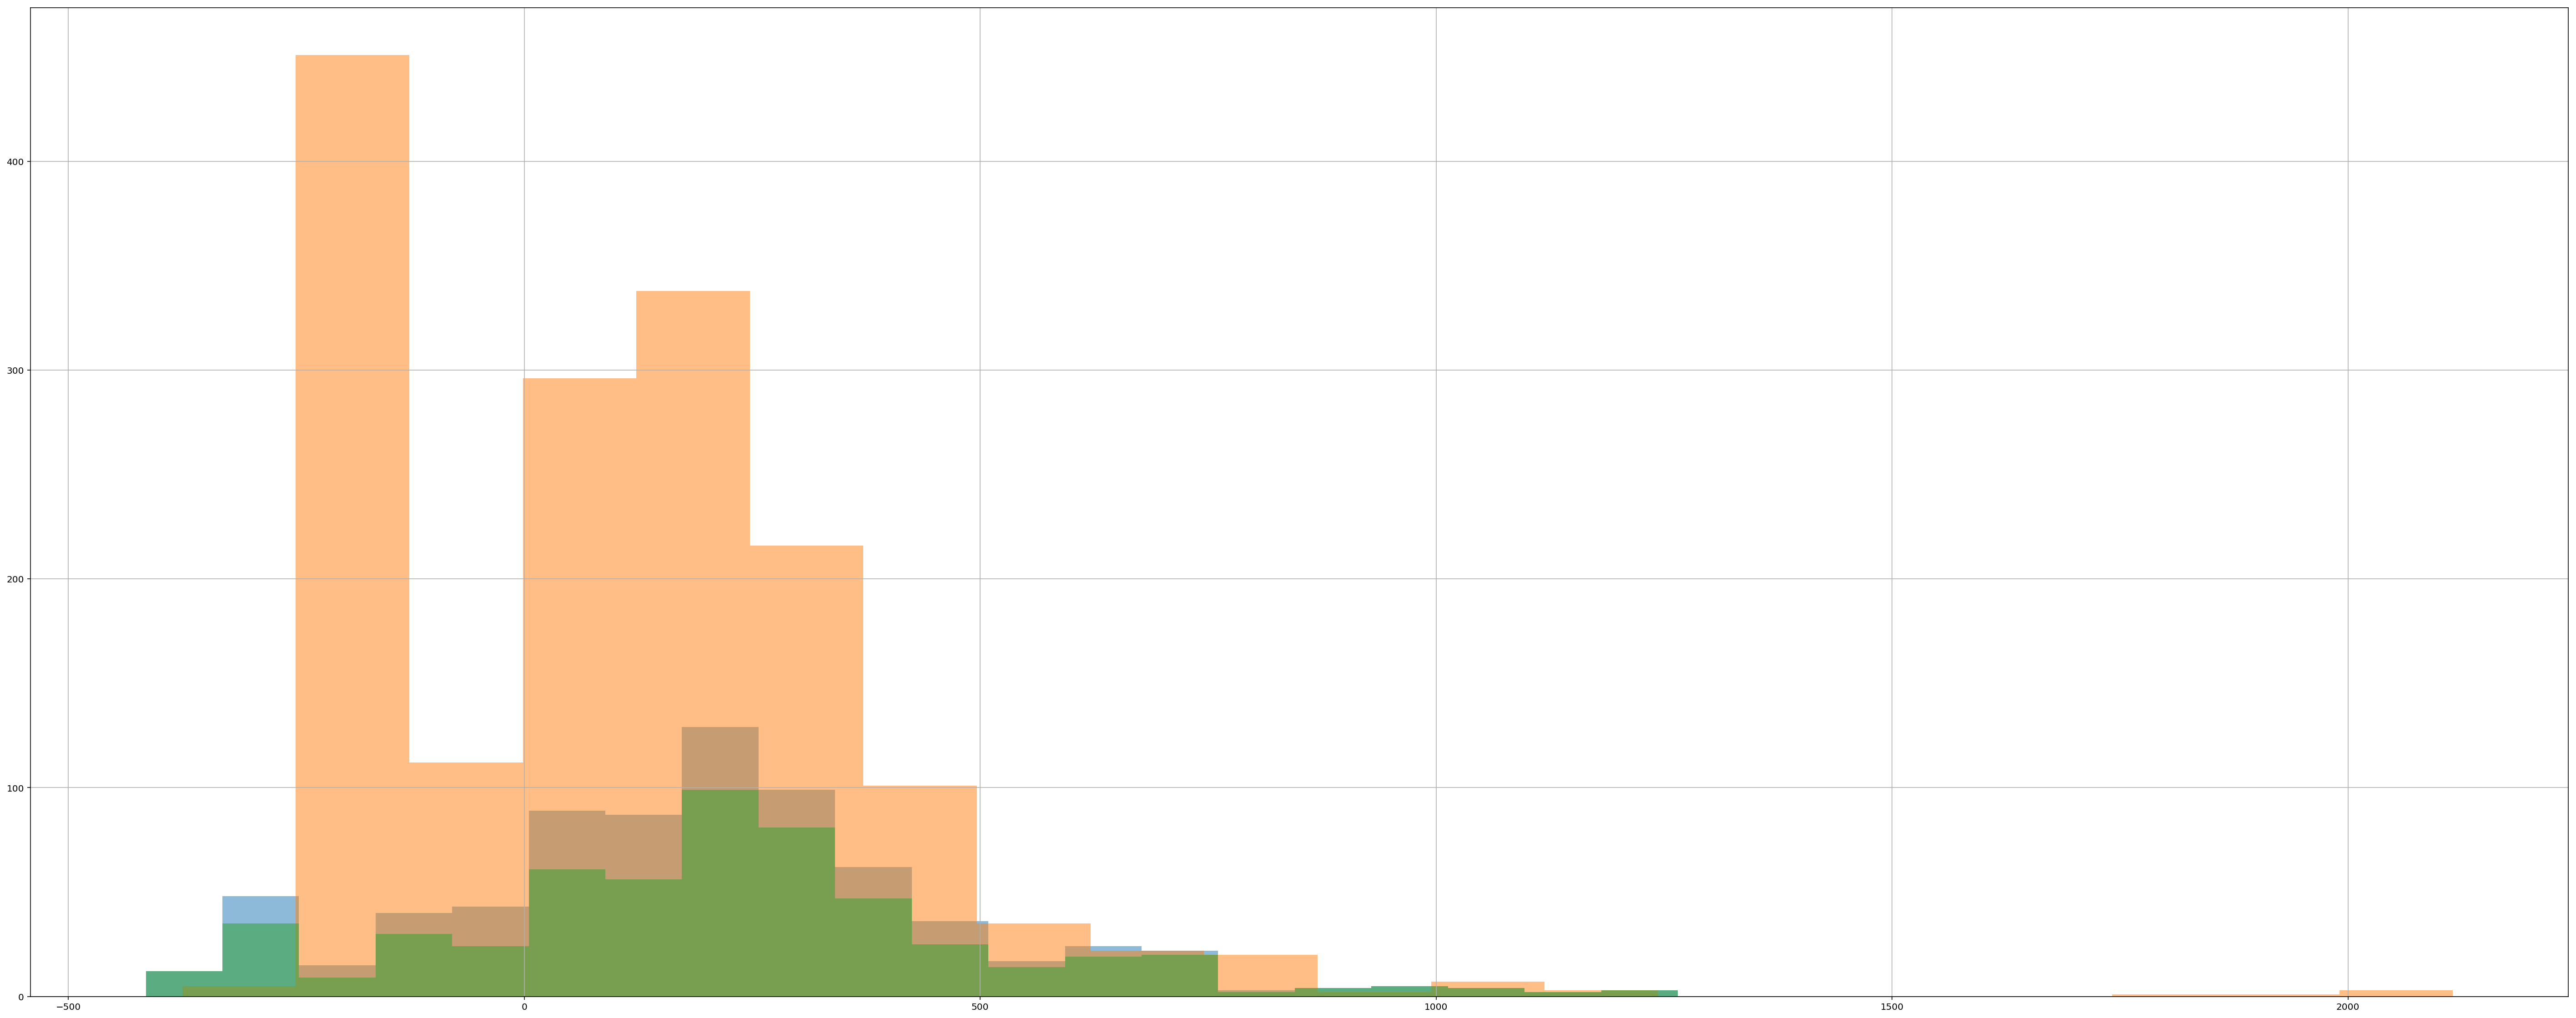

In [16]:
mu.look_at_deals(points[exp_id], [21, 50])

---

In [20]:
#RI buy 5M
exp_id = '5d0e9a21d71f100b8a48f45a'
df[exp_id], points[exp_id] = mu.get_experiment_info(exp_id)

In [21]:
dft = df[exp_id]

In [22]:
df_tuned = dft[dft.fine_tuned == True]
df_not_tuned = dft[dft.fine_tuned == False]

In [23]:
mu.add_colors_and_move(dft.reset_index().sort_values(by='vprofit', ascending=False))

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Step 40, sum 375865, mean=112.56813417190776, std=199.39141472007532 deals=3339
Step 30, sum 123435, mean=190.7805255023184, std=215.03826729292305 deals=647
Final: sum 115080, mean=251.26637554585153, std=279.16692065684066 deals=458


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


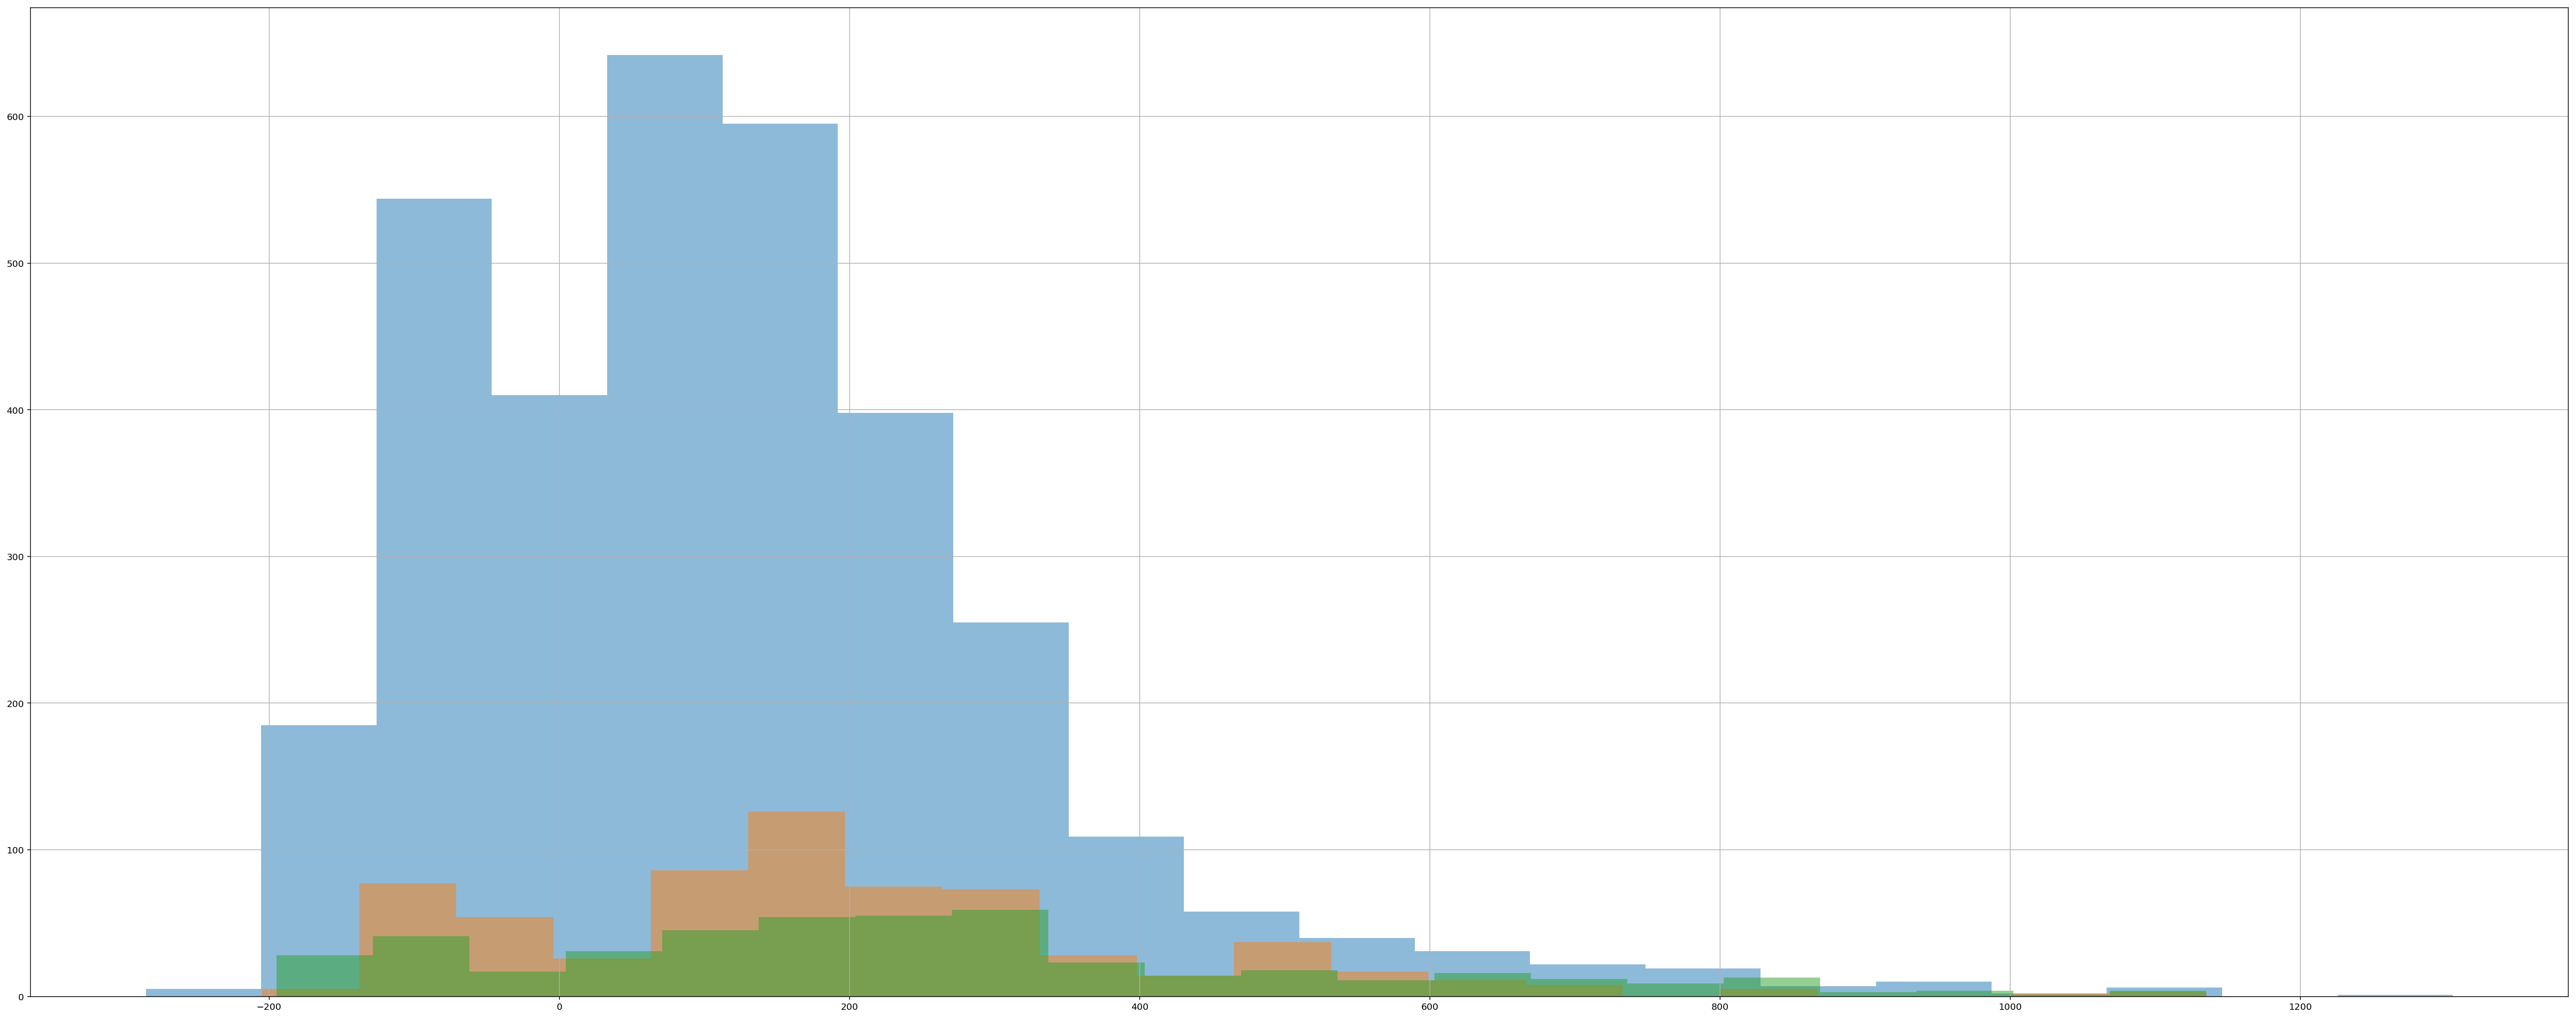

In [26]:
mu.look_at_deals(points[exp_id], [40, 30])

In [ ]:
[exp_id]

--------------


In [31]:
mu.add_colors_and_move(df_tuned.reset_index())

,tprofit,fine_tuned,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,step,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
0,166805,True,148.27,264.43,-116.16,3.05,224375,141.92,287.02,-145.1,2.75,2,6,9,53,174,207,1195,369,1125,95,-525,1125,575,1581,95,-1265
1,136485,True,190.36,316.13,-125.77,1.94,212310,208.56,308.7,-100.14,1.77,99,4,15,34,356,247,2005,369,717,125,-525,1325,575,1018,190,-1265
2,123365,True,199.3,475.29,-275.99,1.68,211835,212.47,468.79,-256.32,1.73,25,5,9,104,363,884,3505,369,619,115,-535,3315,575,997,145,-645
3,145120,True,170.33,458.31,-287.98,2.31,211350,168.27,446.24,-277.97,2.18,72,4,14,56,302,540,2975,369,852,95,-385,2035,575,1256,75,-475
4,147990,True,203.28,317.72,-114.44,1.97,203130,203.95,308.1,-104.15,1.73,99,4,15,34,356,247,2005,369,728,145,-525,1325,575,996,175,-1265
5,146085,True,190.96,282.47,-91.51,2.07,200030,177.33,293.22,-115.89,1.96,1,4,17,31,415,205,1285,369,765,135,-525,1125,575,1128,135,-1265
6,141065,True,214.06,290.96,-76.9,1.79,193625,191.9,304.97,-113.07,1.75,1,4,17,31,415,205,1185,369,659,155,-525,1125,575,1009,165,-1265
7,94510,True,230.51,392.07,-161.56,1.11,192965,233.9,421.73,-187.83,1.43,40,2,5,357,424,808,2035,369,410,125,-525,1625,575,825,195,-1265
8,68605,True,294.44,340.6,-46.16,0.63,113375,230.91,351.52,-120.61,0.85,4,3,5,170,209,247,1225,369,233,285,-525,1335,575,491,245,-1265
9,38720,True,193.6,409.76,-216.16,0.54,111875,295.18,424.62,-129.44,0.66,26,3,5,320,495,620,2005,369,200,115,-525,1625,575,379,265,-1265


---

In [6]:
#RI sell5
exp_id = '5d0e9a1bd71f100b8a48f459'
df[exp_id], points[exp_id] = mu.get_experiment_info(exp_id)

In [17]:
mu.add_colors_and_move(df[exp_id].sort_values(by='tdiff', ascending=False)[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,
23,27895,457.3,445.7,11.6,0.16,47925,439.68,648.01,-208.33,0.19,7,5,247,478,195,1645,375,61,465,-535,2375,580,109,325,-495
40,19285,584.39,631.76,-47.37,0.09,29285,289.95,543.15,-253.2,0.17,8,5,474,335,819,1655,375,33,685,-375,2355,580,101,25,-395
21,145480,195.54,282.82,-87.28,1.98,309700,225.4,368.11,-142.71,2.37,6,5,82,309,220,1265,375,744,195,-415,2615,580,1374,185,-605
39,20890,549.74,639.38,-89.64,0.1,39940,384.04,728.36,-344.32,0.18,7,9,241,222,271,1845,375,38,385,-245,2095,580,104,365,-2325
68,64215,259.98,368.3,-108.32,0.66,124245,303.78,518.71,-214.93,0.71,3,7,295,352,70,1735,375,247,215,-415,1885,580,409,305,-2325
16,46715,362.13,476.73,-114.6,0.34,133845,383.51,441.82,-58.31,0.6,6,3,372,393,751,2275,375,129,225,-425,1925,580,349,365,-455
63,152795,188.4,305.09,-116.69,2.16,311475,231.58,407.65,-176.07,2.32,5,6,77,363,703,1785,375,811,175,-485,2805,580,1345,195,-2325
50,191815,118.92,257.13,-138.21,4.3,350175,142.75,305.2,-162.45,4.23,2,4,95,121,425,2115,375,1613,105,-375,2405,580,2453,115,-495
88,190190,123.82,265.94,-142.12,4.1,390435,159.3,343.33,-184.03,4.23,3,6,54,271,556,1465,375,1536,115,-455,2175,580,2451,135,-645


In [11]:
#RI buy5
exp_id = '5d0e9a1bd71f100b8a48f459'
df[exp_id], points[exp_id] = mu.get_experiment_info(exp_id)
mu.add_colors_and_move(df[exp_id].sort_values(by='tprofit', ascending=False)[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,
74,251680,47.36,213.16,-165.8,14.17,411675,59.34,270.77,-211.43,11.96,1,5,61,337,448,1745,375,5314,45,-615,2455,580,6937,45,-2325
99,216145,128.12,276.31,-148.19,4.5,389045,148.77,344.21,-195.44,4.51,4,6,50,334,571,1785,375,1687,105,-415,2805,580,2615,135,-2325
93,209935,128.56,276.88,-148.32,4.35,402815,151.15,343.89,-192.74,4.59,4,6,52,260,591,1785,375,1633,115,-375,3095,580,2665,125,-645
92,207550,127.33,276.62,-149.29,4.35,377170,145.4,348.01,-202.61,4.47,4,6,52,300,542,1785,375,1630,105,-455,2805,580,2594,115,-645
90,203600,127.73,275.84,-148.11,4.25,392850,152.86,342.21,-189.35,4.43,4,6,53,309,555,1715,375,1594,105,-415,2285,580,2570,125,-645
86,203015,125.09,273.1,-148.01,4.33,363285,149.19,363.09,-213.9,4.2,3,6,54,269,527,1715,375,1623,115,-375,3095,580,2435,125,-2325
96,202845,113.26,257.97,-144.71,4.78,404030,143.99,348.06,-204.07,4.84,4,6,51,237,567,1785,375,1791,95,-375,2805,580,2806,115,-2325
97,198905,126.29,282.89,-156.6,4.2,407360,153.03,348.02,-194.99,4.59,3,6,51,282,784,1785,375,1575,105,-455,3095,580,2662,125,-495
98,198870,118.94,275.86,-156.92,4.46,391785,145.59,343.85,-198.26,4.64,4,6,50,260,466,1785,375,1672,105,-375,3095,580,2691,115,-495


In [7]:
ex = mongo.Experiment.objects(pk='5d0e9a1bd71f100b8a48f459').first()

In [42]:
for p in mongo.Point.objects(experiment = ex, step=74):
    print(p.fine_tuned, p.clf_params)

False {'n_estimators': 10, 'max_depth': 10}
True {'max_features': 20, 'max_depth': 18}


# V1

In [6]:
#RI buy5

dfb, spointb = mu.get_experiment_info('5d0e9a21d71f100b8a48f45a')

In [17]:
mu.add_colors_and_move(dfb.sort_values(by='tpro', ascending=False)[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,
23,27895,457.3,445.7,11.6,0.16,47925,439.68,648.01,-208.33,0.19,7,5,247,478,195,1645,375,61,465,-535,2375,580,109,325,-495
40,19285,584.39,631.76,-47.37,0.09,29285,289.95,543.15,-253.2,0.17,8,5,474,335,819,1655,375,33,685,-375,2355,580,101,25,-395
21,145480,195.54,282.82,-87.28,1.98,309700,225.4,368.11,-142.71,2.37,6,5,82,309,220,1265,375,744,195,-415,2615,580,1374,185,-605
39,20890,549.74,639.38,-89.64,0.1,39940,384.04,728.36,-344.32,0.18,7,9,241,222,271,1845,375,38,385,-245,2095,580,104,365,-2325
68,64215,259.98,368.3,-108.32,0.66,124245,303.78,518.71,-214.93,0.71,3,7,295,352,70,1735,375,247,215,-415,1885,580,409,305,-2325
16,46715,362.13,476.73,-114.6,0.34,133845,383.51,441.82,-58.31,0.6,6,3,372,393,751,2275,375,129,225,-425,1925,580,349,365,-455
63,152795,188.4,305.09,-116.69,2.16,311475,231.58,407.65,-176.07,2.32,5,6,77,363,703,1785,375,811,175,-485,2805,580,1345,195,-2325
50,191815,118.92,257.13,-138.21,4.3,350175,142.75,305.2,-162.45,4.23,2,4,95,121,425,2115,375,1613,105,-375,2405,580,2453,115,-495
88,190190,123.82,265.94,-142.12,4.1,390435,159.3,343.33,-184.03,4.23,3,6,54,271,556,1465,375,1536,115,-455,2175,580,2451,135,-645


In [18]:
#RI buy
dfb, spointb = mu.get_experiment_info('5d0e9a21d71f100b8a48f45a')

In [20]:
mu.add_colors_and_move(dfb.sort_values(by='tprofit', ascending=False)[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,
40,375865,112.57,199.39,-86.82,8.9,575895,109.09,217.1,-108.01,9.1,8,3,37,116,961,1305,375,3339,95,-285,1275,580,5279,95,-1265
18,317545,84.97,201.53,-116.56,9.97,451745,70.42,229.05,-158.63,11.06,1,4,334,419,182,1155,375,3737,55,-655,3055,580,6415,35,-1265
21,289845,38.8,156.17,-117.37,19.92,433550,41.21,166.25,-125.04,18.14,1,34,193,185,129,1075,375,7471,5,-555,995,580,10520,5,-1265
75,213225,132.36,311.52,-179.16,4.3,335735,134.03,375.77,-241.74,4.32,4,10,46,201,655,2065,375,1611,95,-555,3315,580,2505,75,-1265
74,172875,159.33,354.79,-195.46,2.89,242170,139.34,369.15,-229.81,3,2,13,56,221,612,2125,375,1085,105,-315,1585,580,1738,55,-565
55,165700,80.91,376.81,-295.9,5.46,195385,65.54,382.35,-316.81,5.14,1,21,375,173,774,3555,375,2048,-5,-1145,1845,580,2981,-145,-1265
62,158605,145.38,348.97,-203.59,2.91,244320,139.93,363.99,-224.06,3.01,2,13,57,178,689,1925,375,1091,65,-285,1635,580,1746,40,-1265
53,144405,261.13,277.37,-16.24,1.47,283245,248.68,341.94,-93.26,1.96,5,4,80,373,318,1205,375,553,215,-335,3315,580,1139,215,-1265
72,140800,178.68,355.94,-177.26,2.1,261850,190.3,403.42,-213.12,2.37,2,11,63,276,515,2115,375,788,125,-615,3315,580,1376,135,-535


# V1

In [ ]:
#RI buy
dfb, bpoints = mu.get_experiment_info('5cdc8f34d71f102dbd7b03c7')

In [ ]:
mu.add_colors_and_move(dfb[:20])

In [149]:
#RI sell m10
dfsm10, sm10points = mu.get_experiment_info('5cedb5e7d71f1089a8568141')

In [150]:
mu.add_colors_and_move(dfsm10[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,EVAL_MAX_LENGTH,EVAL_MIN_PROFIT,EVAL_STOP_LOSS,EVAL_TRAILING_STOP,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,MODEL_MAX_DEPTH,MODEL_N_ESTIMATORS,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,188340,144.99,231.85,-86.86,2.97,1292270,148.33,303.64,-155.31,4.38,10,262,182,240,8,3,85,378,102,12,130,1070,438,1299,130,-440,3090,1990,8712,120,-590
274,175570,232.54,239.47,-6.93,1.72,1250970,245.77,324.06,-78.29,2.56,12,424,151,112,2,3,59,267,378,5,30,990,438,755,220,-310,3090,1990,5090,210,-500
284,166760,108.92,266.93,-158.01,3.5,1232970,118.93,309.63,-190.7,5.21,9,60,66,126,1,4,260,239,142,4,143,1070,438,1531,70,-310,2430,1990,10367,100,-650
360,169020,149.58,274.37,-124.79,2.58,1220180,157.5,336.35,-178.85,3.89,11,125,371,301,3,4,40,296,59,9,134,1230,438,1130,120,-370,2430,1990,7747,140,-2330
64,177960,153.41,273,-119.59,2.65,1216190,153.37,324.43,-171.06,3.98,5,373,309,150,6,4,124,242,137,6,128,1230,438,1160,130,-330,2430,1990,7930,130,-650
387,163800,139.76,286.74,-146.98,2.68,1100710,139.4,341.09,-201.69,3.97,13,282,294,186,2,5,30,325,129,9,112,1300,438,1172,120,-440,2320,1990,7896,120,-930
157,145360,168.05,294.54,-126.49,1.97,1099050,179.7,360.95,-181.25,3.07,8,473,439,102,6,4,54,400,93,12,137,1230,438,865,150,-440,2430,1990,6116,160,-2330
123,160860,239.73,325.41,-85.68,1.53,1056900,231.27,399.5,-168.23,2.3,13,185,232,184,2,6,33,342,59,3,85,1110,438,671,220,-440,3020,1990,4570,200,-650
390,151290,185.63,317.5,-131.87,1.86,1046740,181.92,366.08,-184.16,2.89,12,266,285,252,4,5,47,318,227,8,111,1300,438,815,170,-440,2180,1990,5754,160,-930


In [159]:
#RI sell m1
dfsm1, sm1points = mu.get_experiment_info('5cedb5cbd71f1089a8568140')

## RI buy m1, 5cedb5cbd71f1089a8568140, space for gen2
- LABEL_DEAL_NO_DEAL = 3
- LABEL_MAX_LENGTH = 3:5
- LABEL_MIN_PROFIT = 80:140
- LABEL_STOP_LOSS = 200:400
- MODEL_MAX_DEPTH = 5:10
- MODEL_N_ESTIMATORS 80:300
- LABEL_TRAILING_STOP = 100:500
- LABEL_STOP_LOSS = 700
- EVAL_STOP_LOSS = 700

In [160]:
mu.add_colors_and_move(dfsm1[:20])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,EVAL_MAX_LENGTH,EVAL_MIN_PROFIT,EVAL_STOP_LOSS,EVAL_TRAILING_STOP,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,MODEL_MAX_DEPTH,MODEL_N_ESTIMATORS,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,30330,61.03,97.18,-36.15,11.04,254870,65.49,124.23,-58.74,19.17,7,363,449,242,3,3,108,264,312,7,90,410,45,497,50,-290,1560,203,3892,50,-460
16,32360,36.44,91.4,-54.96,19.73,241750,36.24,116.8,-80.56,32.86,18,195,487,69,2,3,80,116,441,12,143,410,45,888,30,-280,1560,203,6671,30,-2330
197,28610,37.25,95.89,-58.64,17.07,225470,41.26,124.01,-82.75,26.92,13,151,404,424,6,3,235,105,317,9,105,410,45,768,30,-570,1560,203,5465,40,-2330
247,32160,35.73,101.79,-66.06,20,206360,34.82,130.09,-95.27,29.2,9,203,99,306,3,4,372,348,106,7,133,480,45,900,30,-570,1510,203,5927,30,-750
177,26360,26.28,100.46,-74.18,22.29,169410,27.65,136.51,-108.86,30.19,12,159,98,348,4,5,464,464,268,9,171,530,45,1003,20,-570,1560,203,6128,20,-1090
241,22460,15,88.16,-73.16,33.27,160720,17.2,111.04,-93.84,46.02,12,467,141,164,4,3,207,302,170,18,123,410,45,1497,10,-400,1560,203,9342,10,-750
18,22570,27.56,122.53,-94.97,18.2,160370,29.91,145.44,-115.53,26.41,6,351,196,367,1,8,499,58,380,3,122,760,45,819,10,-570,2040,203,5362,-10,-680
597,20530,21.79,99.09,-77.3,20.93,153110,24.19,130.06,-105.87,31.18,18,251,127,67,7,3,208,376,65,6,136,510,45,942,20,-620,1560,203,6329,20,-1090
21,15730,38.37,105.86,-67.49,9.11,146740,48.51,137.11,-88.6,14.9,7,48,329,239,8,3,178,97,490,16,112,460,45,410,30,-270,1560,203,3025,40,-750


In [15]:
#RI buy
dfs, spoints = mu.get_experiment_info('5ce3f073d71f1037c0e267ca')

In [16]:
mu.add_colors_and_move(dfs.data[:10])

,tprofit,tmean,tstd,tdiff,tdeals_per_day,vprofit,vmean,vstd,vdiff,vdeals_per_day,EVAL_MAX_LENGTH,EVAL_MIN_PROFIT,EVAL_STOP_LOSS,EVAL_TRAILING_STOP,LABEL_DEAL_NO_DEAL,LABEL_MAX_LENGTH,LABEL_MIN_PROFIT,LABEL_STOP_LOSS,LABEL_TRAILING_STOP,MODEL_MAX_DEPTH,MODEL_N_ESTIMATORS,tbest_deal,tdays,tdeals_count,tmedian,tworst_deal,vbest_deal,vdays,vdeals_count,vmedian,vworst_deal
step,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135,147010,103.38,172.7,-69.32,6.32,997010,108.1,215.84,-107.74,9.09,11,455,196,393,2,3,130,444,179,3,85,920,225,1422,90,-460,1920,1015,9223,90,-650
87,133480,70.77,173.17,-102.4,8.38,870130,71.08,210.83,-139.75,12.06,11,315,370,161,1,3,133,319,69,5,185,980,225,1886,60,-410,1920,1015,12241,60,-750
113,104850,69.85,192.44,-122.59,6.67,696130,73.63,236.4,-162.77,9.32,13,152,191,53,1,4,211,246,301,6,184,800,225,1501,60,-620,2400,1015,9455,50,-750
182,101270,53.53,177.51,-123.98,8.41,675440,56.26,205.14,-148.88,11.83,11,161,202,388,3,3,129,107,383,7,22,920,225,1892,40,-620,1910,1015,12006,40,-2330
199,115330,66.43,167.2,-100.77,7.72,659240,58.26,212.59,-154.33,11.15,13,363,190,262,5,3,121,324,384,19,198,920,225,1736,50,-410,1920,1015,11316,50,-1090
5,107210,65.09,188.16,-123.07,7.32,638840,60.8,246.6,-185.8,10.35,6,190,157,474,1,4,131,496,430,10,92,690,225,1647,50,-530,2400,1015,10508,50,-2330
29,96150,50.24,176.34,-126.1,8.51,569270,48.2,233.79,-185.59,11.64,6,38,243,340,7,4,52,462,304,13,170,800,225,1914,40,-570,2400,1015,11810,40,-2330
92,88190,89.99,190.7,-100.71,4.36,563060,88.31,236.27,-147.96,6.28,18,183,278,201,9,3,156,124,436,14,84,920,225,980,80,-280,1920,1015,6376,60,-1090
176,86980,57.72,194.04,-136.32,6.7,555290,61.47,243.4,-181.93,8.9,16,382,276,245,6,4,191,225,194,10,91,860,225,1507,50,-620,2400,1015,9034,40,-2330


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Step 67, sum 188340, mean=144.98845265588915, std=231.85371235835913 deals=1299
Step 256, sum 86010, mean=328.2824427480916, std=236.2569474275904 deals=262
Step 181, sum 67640, mean=304.68468468468467, std=296.6443391121356 deals=222
Final: sum 43590, mean=389.19642857142856, std=236.93667528527132 deals=112


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


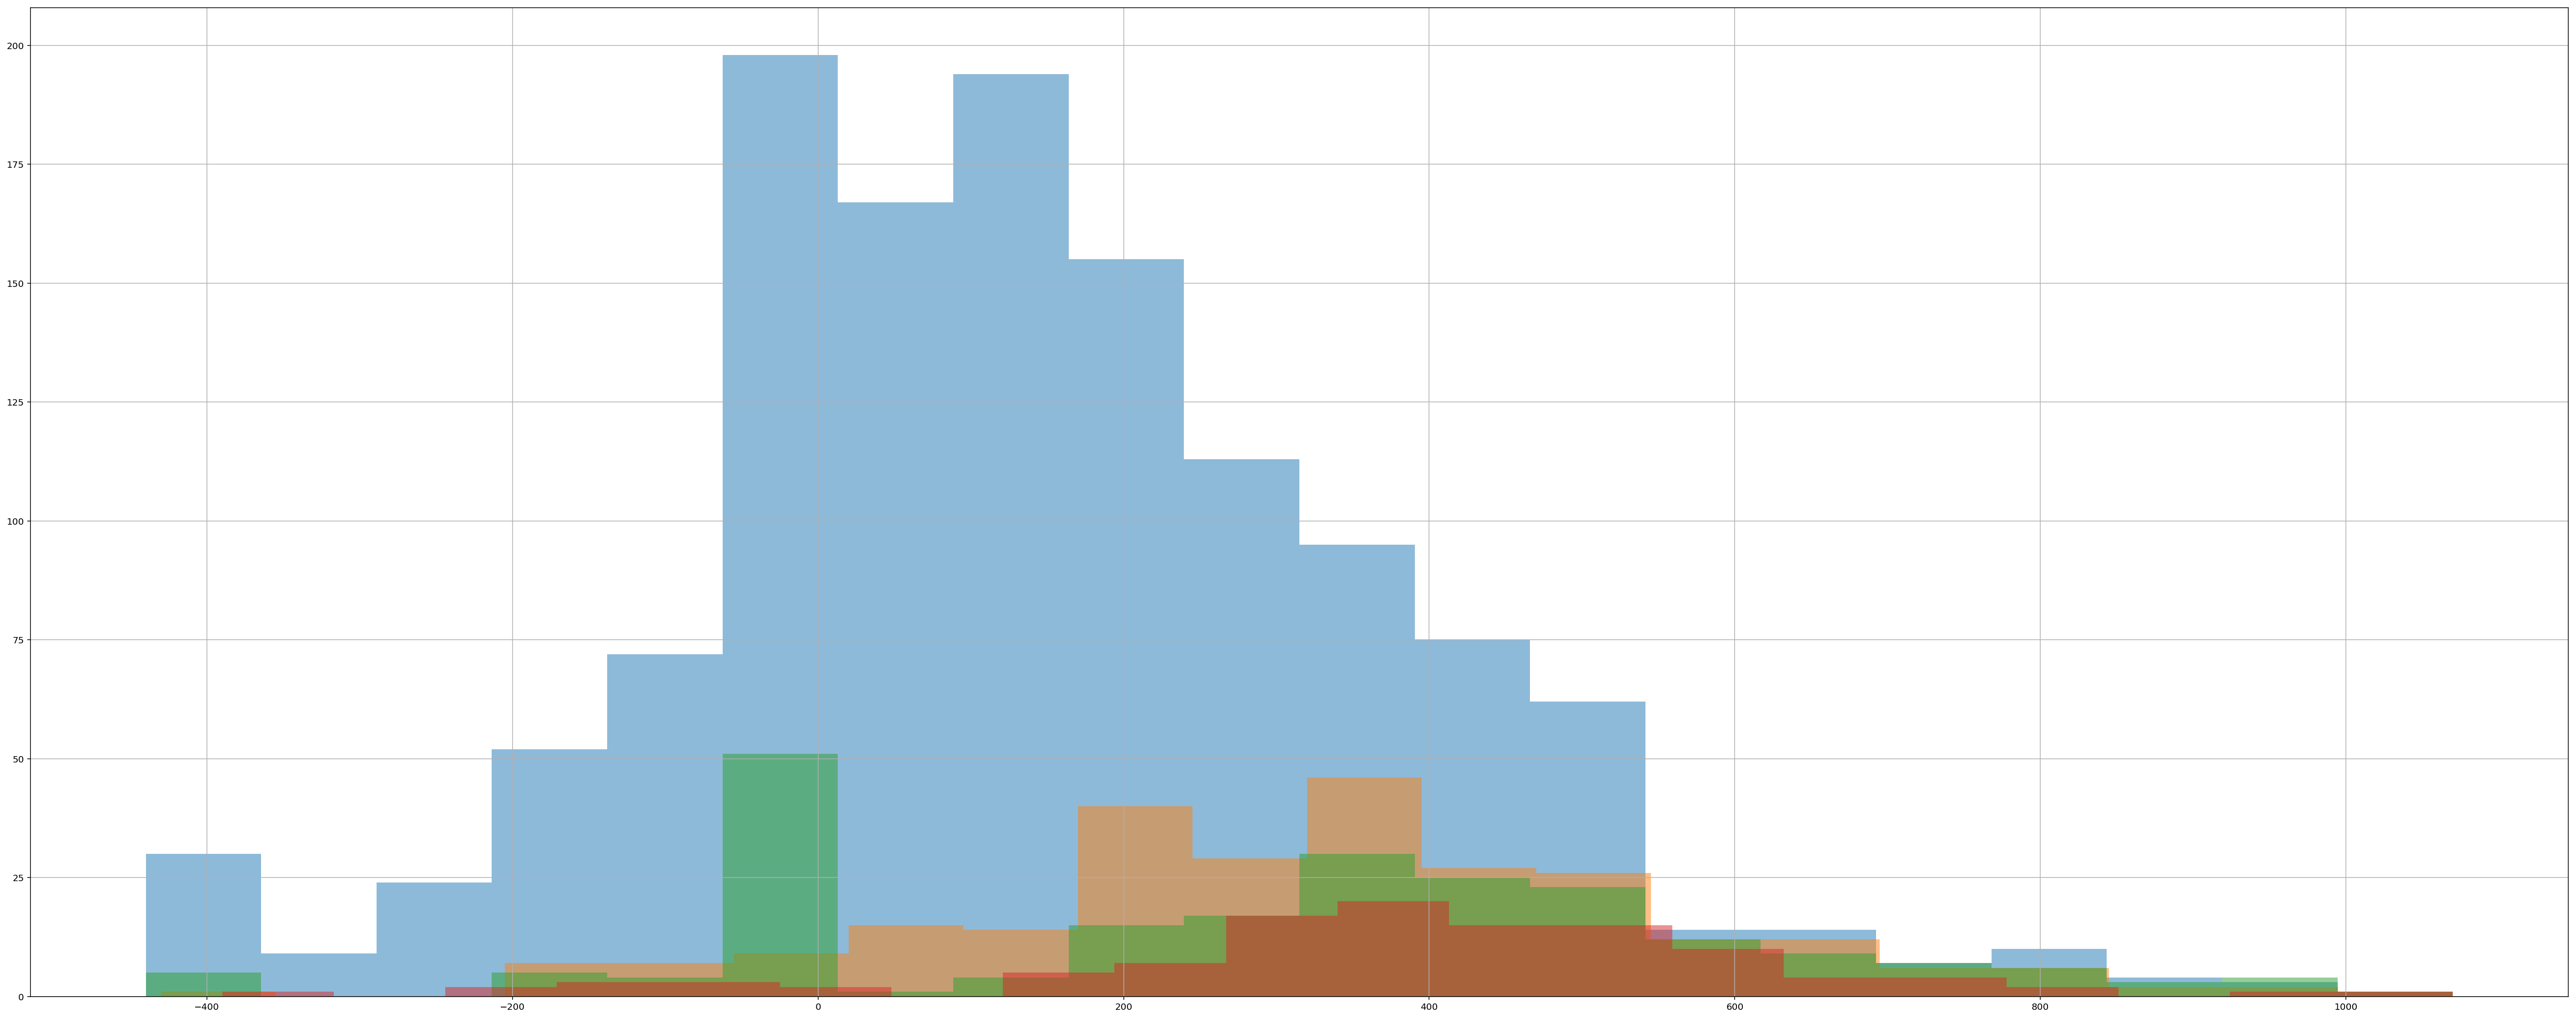

In [144]:
mu.look_at_deals(sm10points, [67,256, 181])

DEBUG:matplotlib.axes._base:update_title_pos


Step 11, sum 30330, mean=61.0261569416499, std=97.17560447333258 deals=497
Step 16, sum 32360, mean=36.44144144144144, std=91.40365369409564 deals=888
Step 18, sum 22570, mean=27.55799755799756, std=122.5329454979992 deals=819
Step 21, sum 15730, mean=38.36585365853659, std=105.85552180313151 deals=410
Final: sum 9530, mean=78.7603305785124, std=116.07160324510818 deals=121


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


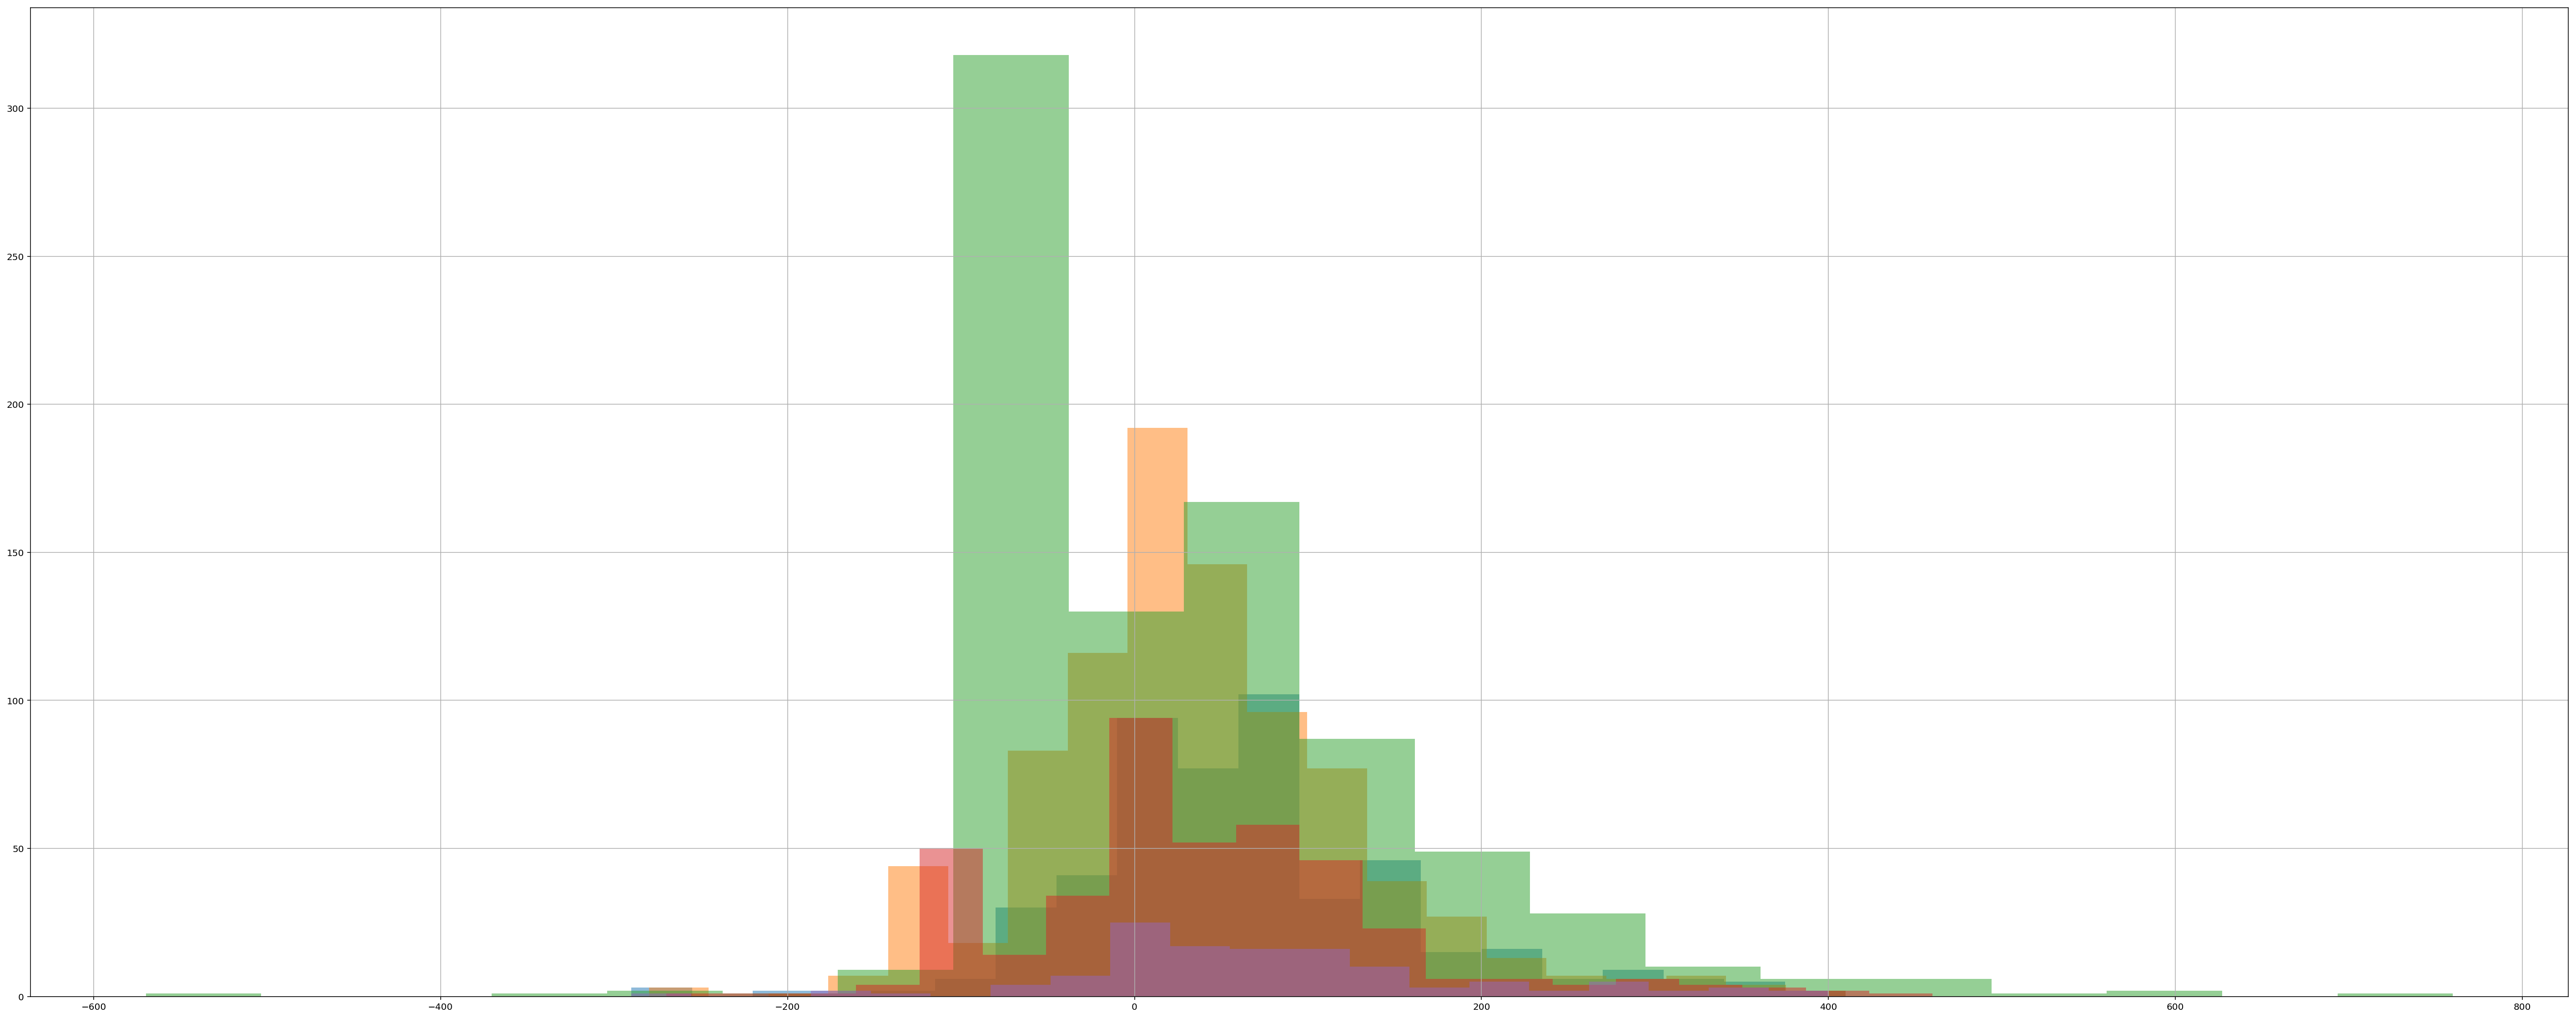

In [155]:
mu.look_at_deals(bpoints, [11, 16,18, 21])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Step 87, sum 133480, shape=1886
Step 135, sum 147010, shape=1422
Overall sum=136910, min=-350, deals=1517


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


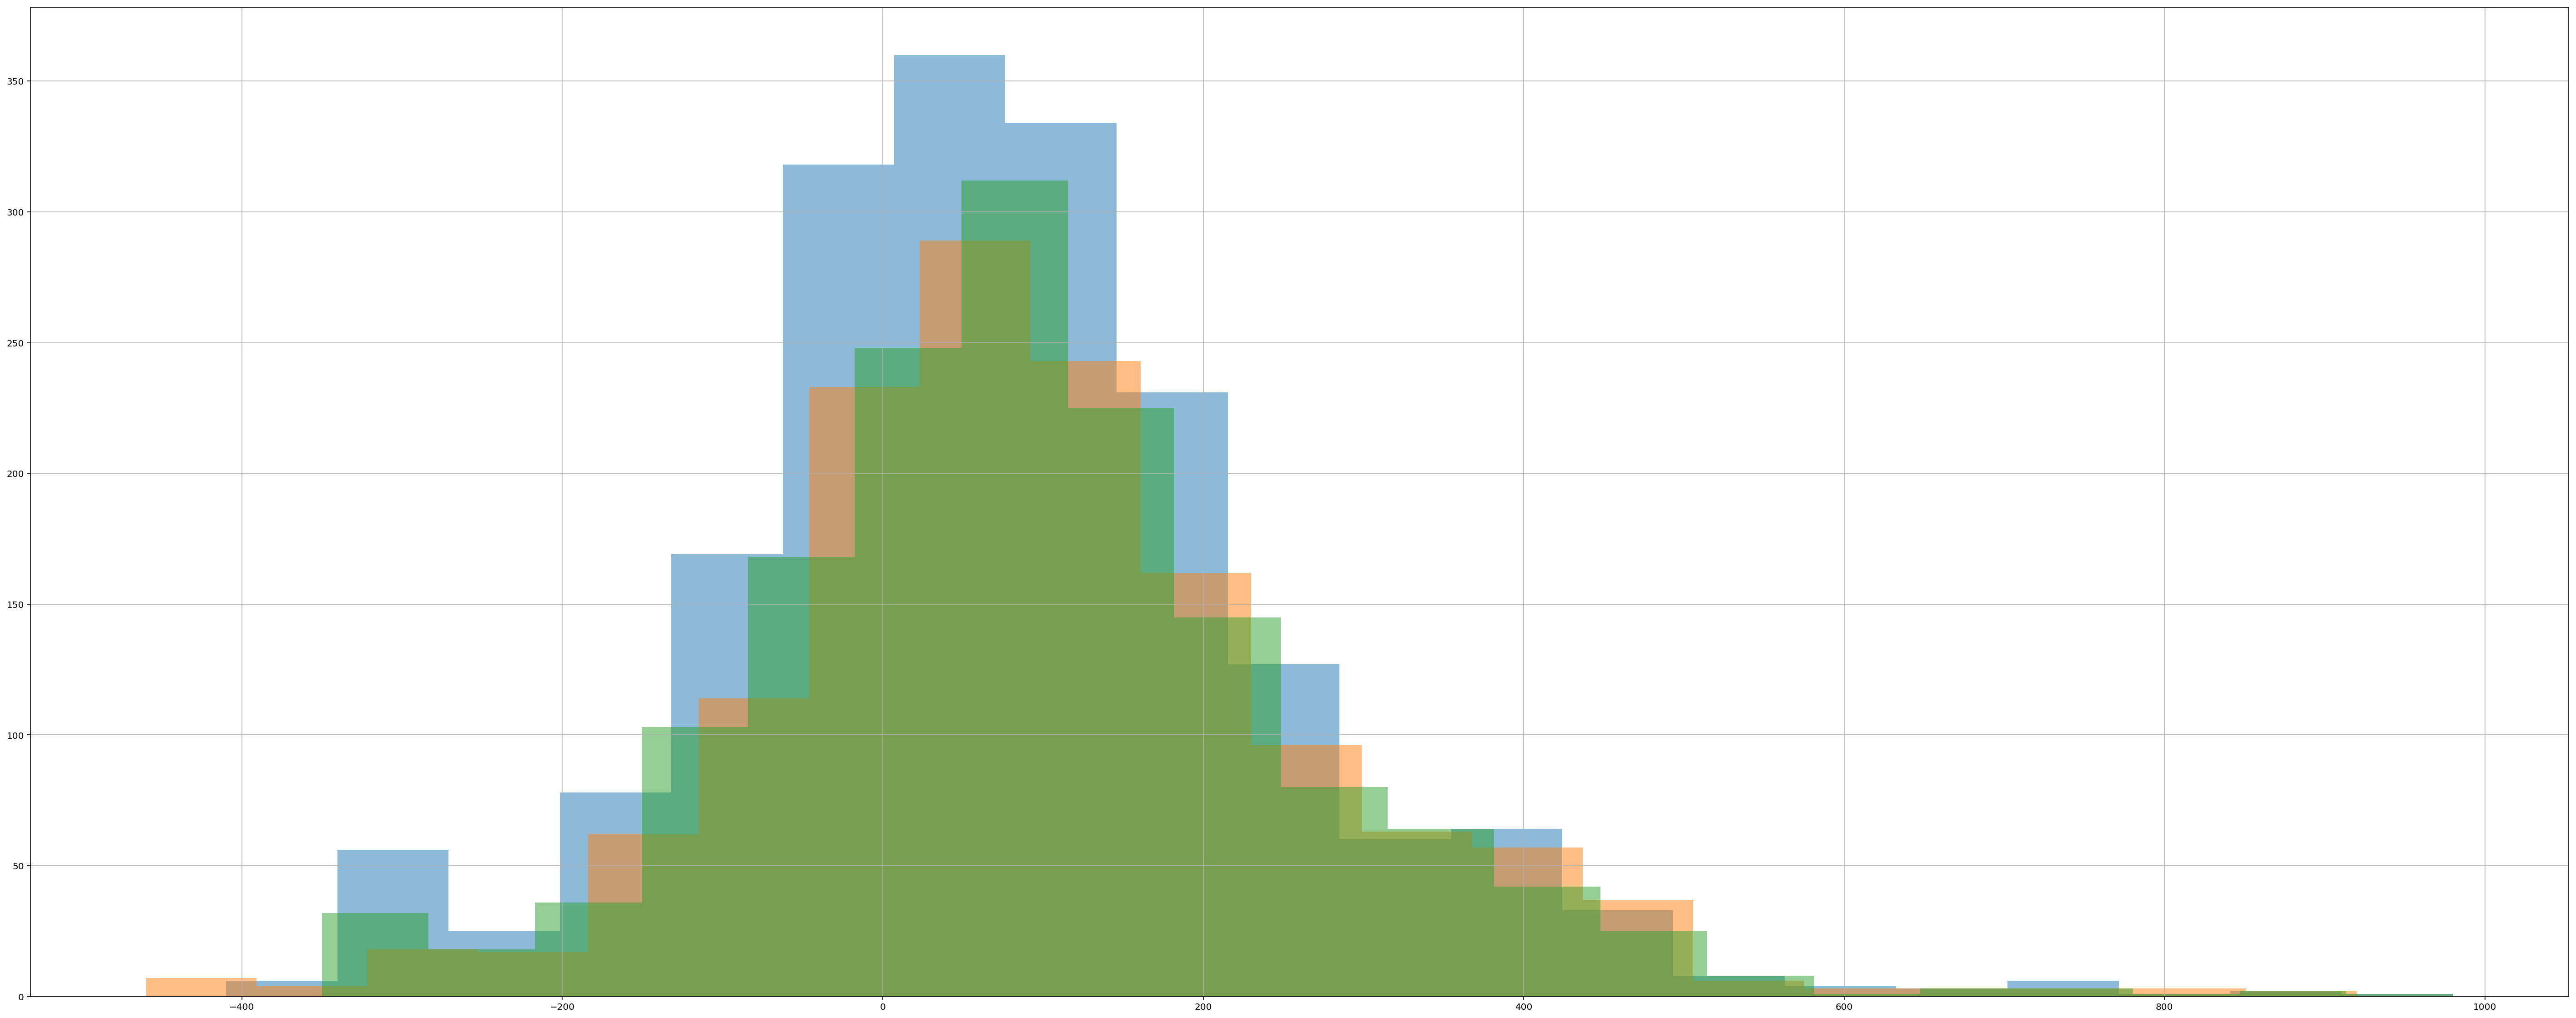

In [19]:
mu.look_at_deals(spoints, [87, 135])

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Step 135, sum 147010, shape=1422
Step 87, sum 133480, shape=1886
Step 113, sum 104850, shape=1501
Overall sum=117360, min=-460, deals=1076


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


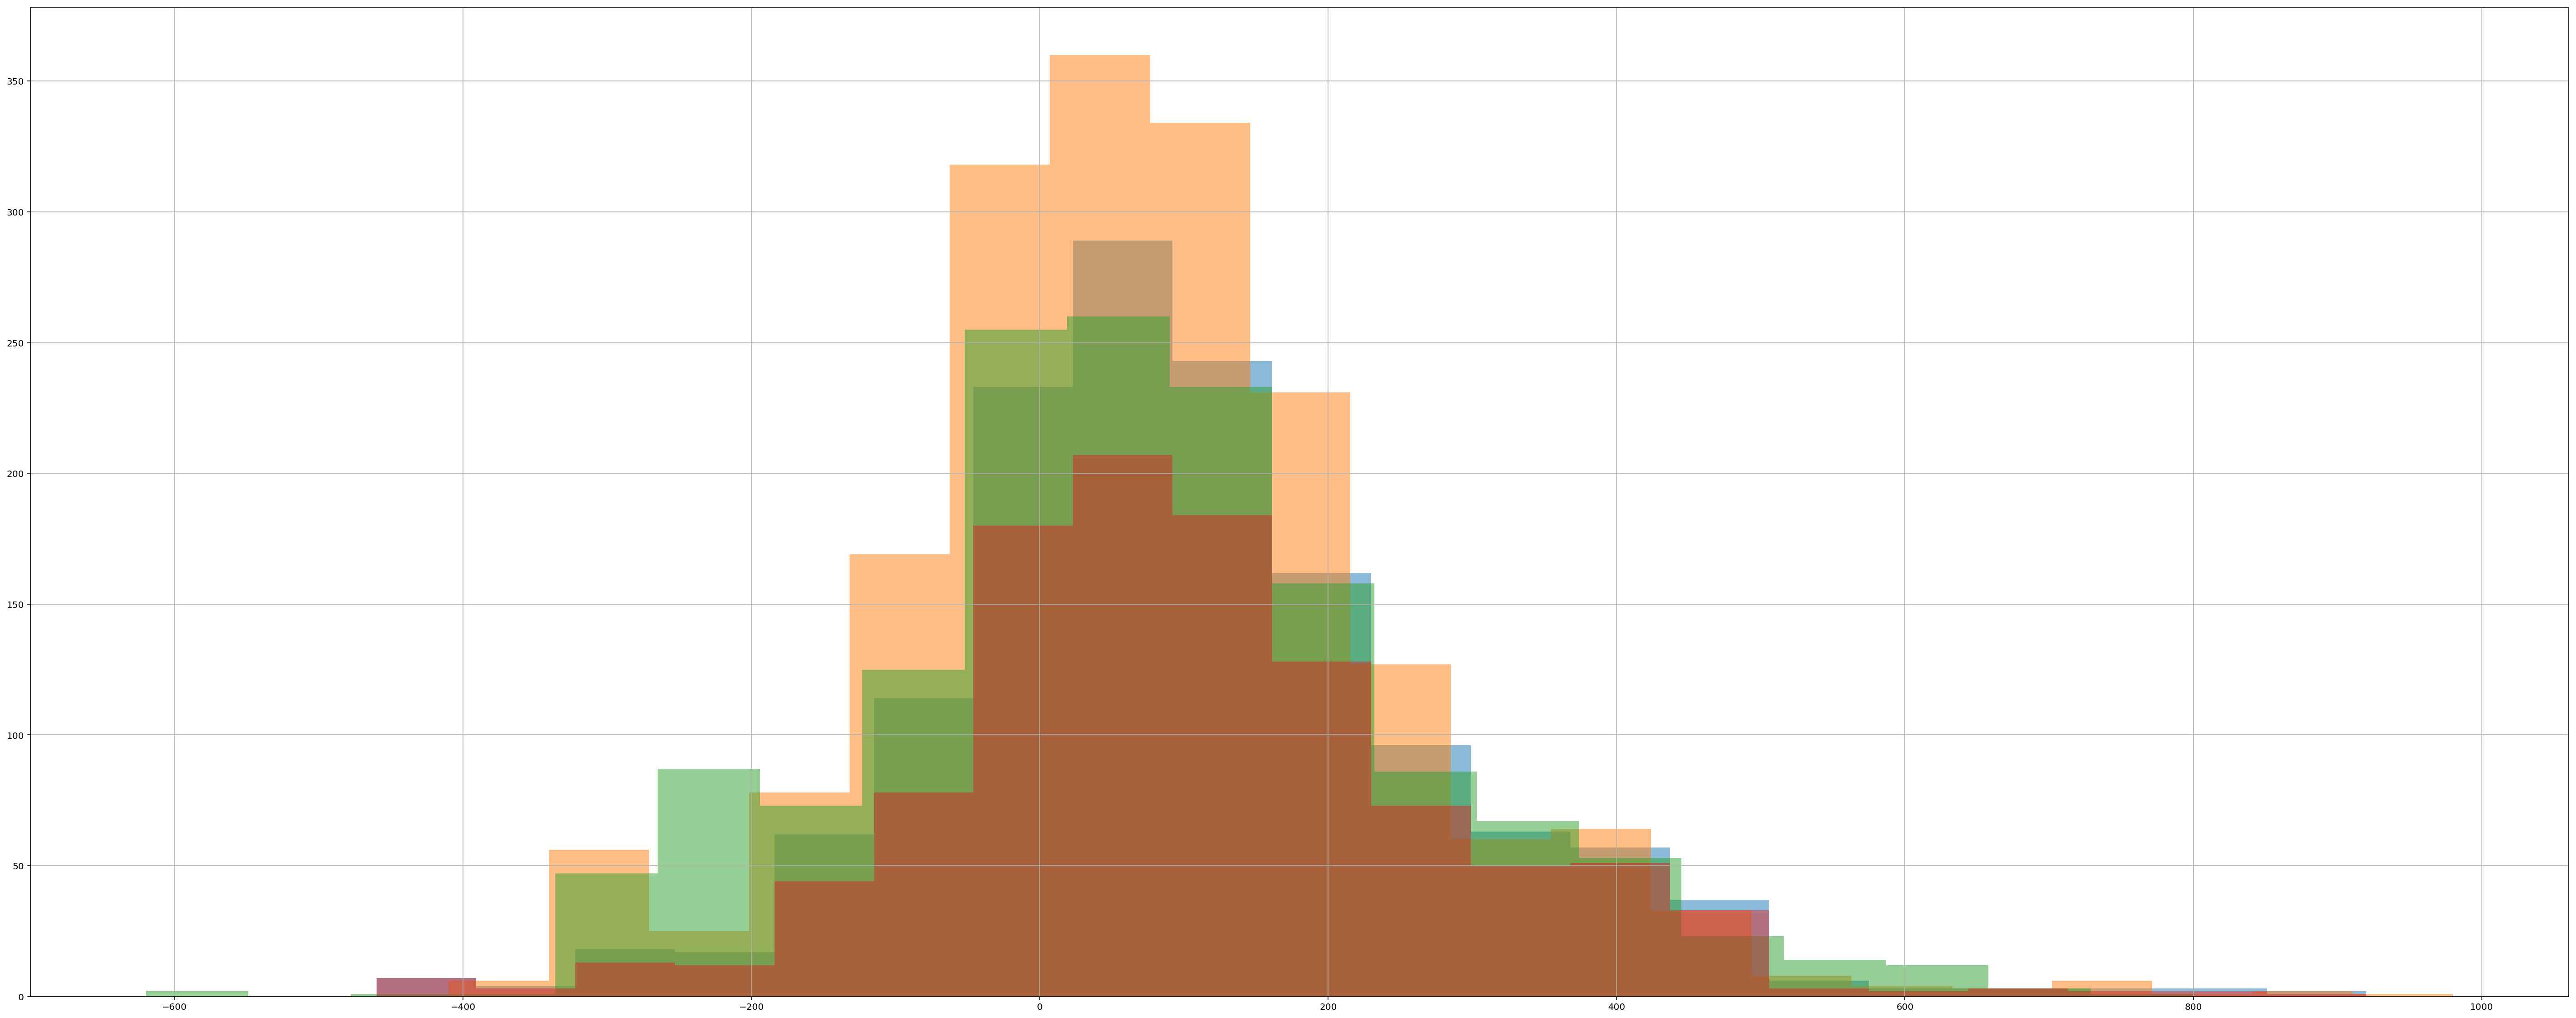

In [21]:
mu.look_at_deals(spoints, [135, 87, 113])